In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", lambda x: f"{x:0.4f}")
sns.set(style="whitegrid")

In [85]:
# Load the updated dataset
data = pd.read_csv("financial_fraud_detection_dataset.csv")

print("Shape:", data.shape)
data.head()

Shape: (5000000, 18)


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.7800,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.2100,3,0.2200,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.6500,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.1400,7,0.9600,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.8600,deposit,other,London,pos,False,NaN,NaN,-1.7800,20,0.8900,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.2200,deposit,online,Sydney,pos,False,NaN,NaN,-0.6000,6,0.3700,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.4300,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.7900,13,0.2700,ACH,108.161.108.255,D7637601


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [87]:
data.describe()

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5000000.0000,4103487.0000,5000000.0000,5000000.0000,5000000.0000
mean,358.9343,1.5258,-0.0004,10.5013,0.5000
std,469.9333,3576.5687,1.0008,5.7668,0.2886
min,0.0100,-8777.8142,-5.2600,1.0000,0.0000
25%,26.5700,-2562.3761,-0.6800,5.0000,0.2500
50%,138.6700,0.8443,0.0000,11.0000,0.5000
75%,503.8900,2568.3387,0.6700,16.0000,0.7500
max,3520.5700,8757.7585,5.0200,20.0000,1.0000


In [88]:
import os
from pathlib import Path

## Create Sample for EDA

In [89]:
# Create a 200k sample for EDA (fast & safe)
import numpy as np

SAMPLE_SIZE = 400_000
np.random.seed(42)

# If dataset smaller, take full
if len(data) <= SAMPLE_SIZE:
    data_sample = data.copy()
else:
    data_sample = data.sample(n=SAMPLE_SIZE, random_state=42)

print("Sample shape:", data_sample.shape)
data_sample.head()

Sample shape: (400000, 18)


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
3577888,T3677888,2023-04-09T20:06:09.254118,ACC529887,ACC346873,11.6700,transfer,online,London,pos,False,NaN,-6143.8042,0.8700,11,0.8900,ACH,143.188.216.101,D1912159
4993932,T5093932,2023-07-16T05:26:15.162082,ACC872160,ACC767192,184.3100,payment,other,Tokyo,pos,False,NaN,-512.1619,-0.5400,10,0.6500,ACH,147.167.236.198,D5847071
4094900,T4194900,2023-12-13T19:04:47.539751,ACC403211,ACC536309,930.3400,deposit,travel,Toronto,pos,False,NaN,2156.2218,-0.6800,19,0.4000,ACH,83.44.197.232,D2907026
4420497,T4520497,2023-12-15T12:06:09.051479,ACC313245,ACC322871,0.0100,withdrawal,restaurant,Berlin,mobile,False,NaN,2166.3442,1.5800,14,0.9700,UPI,168.84.79.173,D7924413
634465,T734465,2023-11-19T21:33:24.238666,ACC570417,ACC246664,131.1600,withdrawal,restaurant,Dubai,mobile,False,NaN,-131.3436,-1.5400,20,0.7000,card,128.58.20.122,D5999152


## Check data types, missing values

In [90]:
# Show data types
print("Data Types:")
display(data_sample.dtypes)

Data Types:


transaction_id                  object
timestamp                       object
sender_account                  object
receiver_account                object
amount                         float64
transaction_type                object
merchant_category               object
location                        object
device_used                     object
is_fraud                          bool
fraud_type                      object
time_since_last_transaction    float64
spending_deviation_score       float64
velocity_score                   int64
geo_anomaly_score              float64
payment_channel                 object
ip_address                      object
device_hash                     object
dtype: object

In [91]:
# Missing values
missing = data.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(data)) * 100

print("\nMissing Values:")
display(pd.DataFrame({"missing": missing, "missing_pct": missing_pct.round(3)}).head(20))


Missing Values:


,missing,missing_pct
fraud_type,4820447,96.4090
time_since_last_transaction,896513,17.9300
timestamp,0,0.0000
transaction_id,0,0.0000
sender_account,0,0.0000
receiver_account,0,0.0000
merchant_category,0,0.0000
location,0,0.0000
amount,0,0.0000
transaction_type,0,0.0000


### Fraud distribution

Fraud counts:
is_fraud
False    385639
True      14361
Name: count, dtype: int64

Fraud percentage:
is_fraud
False   96.4098
True     3.5902
Name: proportion, dtype: float64


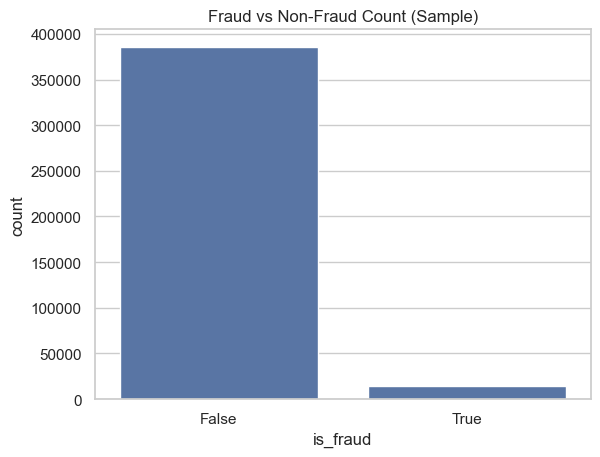

In [92]:
# Fraud distribution
fraud_col = "is_fraud"

print("Fraud counts:")
print(data_sample[fraud_col].value_counts())

print("\nFraud percentage:")
print(data_sample[fraud_col].value_counts(normalize=True) * 100)

# Barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_sample, x=fraud_col)
plt.title("Fraud vs Non-Fraud Count (Sample)")
plt.show()

## Inspect important categorical columns


Top values for transaction_type:


transaction_type
payment       100381
deposit       100153
withdrawal    100103
transfer       99363
Name: count, dtype: int64

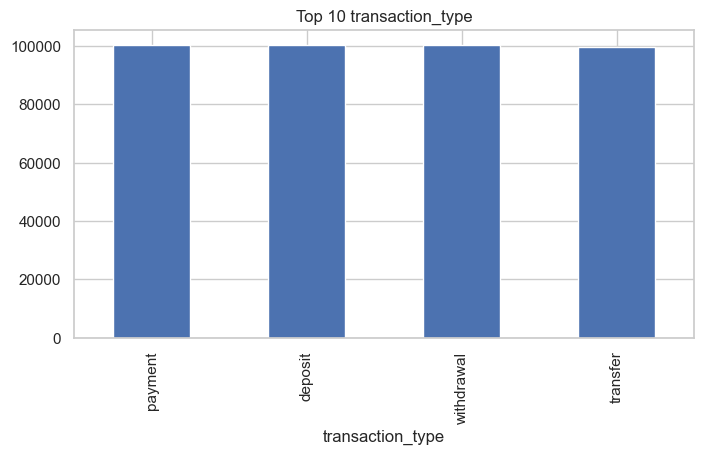


Top values for merchant_category:


merchant_category
travel           50354
entertainment    50222
restaurant       50096
other            49974
online           49923
retail           49910
utilities        49792
grocery          49729
Name: count, dtype: int64

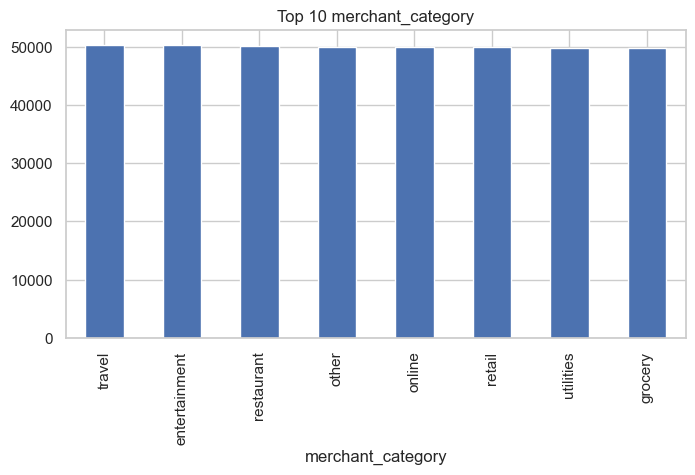


Top values for device_used:


device_used
atm       100281
pos        99963
mobile     99959
web        99797
Name: count, dtype: int64

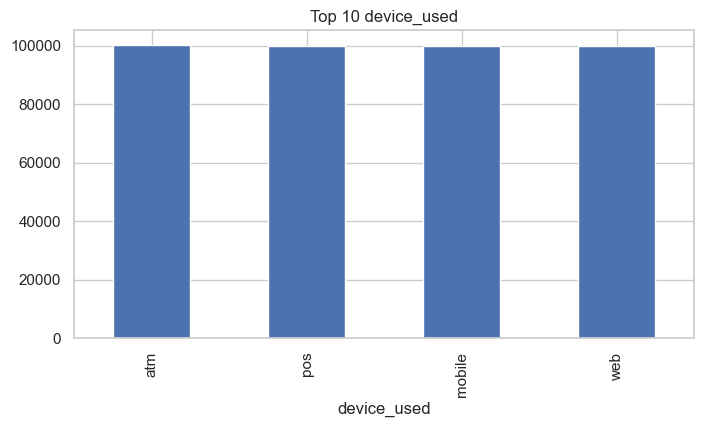


Top values for payment_channel:


payment_channel
card             100259
ACH              100140
wire_transfer     99902
UPI               99699
Name: count, dtype: int64

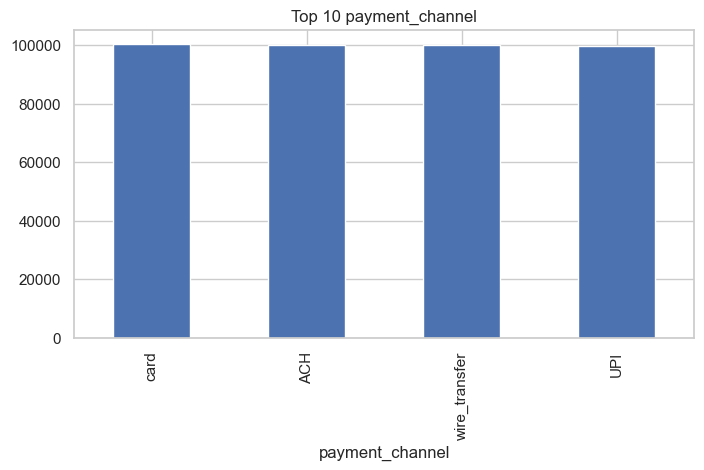


Top values for location:


location
Singapore    50429
Toronto      50109
Sydney       50095
Berlin       50001
Dubai        49914
Tokyo        49879
London       49802
New York     49771
Name: count, dtype: int64

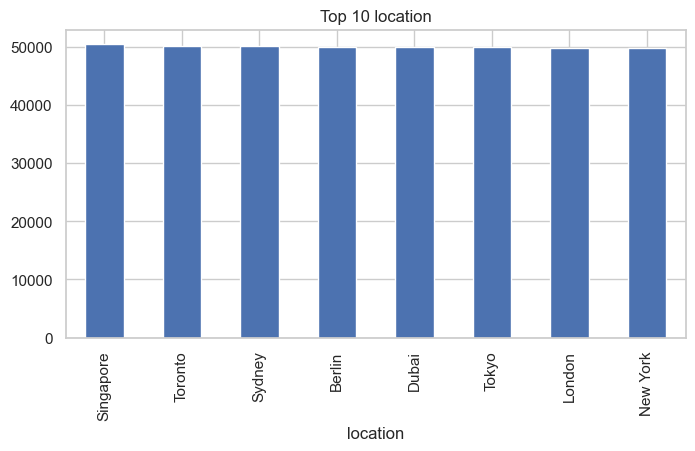

In [93]:
categorical_cols = [
    "transaction_type", "merchant_category",
    "device_used", "payment_channel", "location"
]

for col in categorical_cols:
    if col in data_sample.columns:
        print(f"\nTop values for {col}:")
        display(data_sample[col].value_counts().head(10))
        
        plt.figure(figsize=(8,4))
        data_sample[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"Top 10 {col}")
        plt.show()
    else:
        print(f"{col} not found in dataset.")

## 5. Numeric column distributions

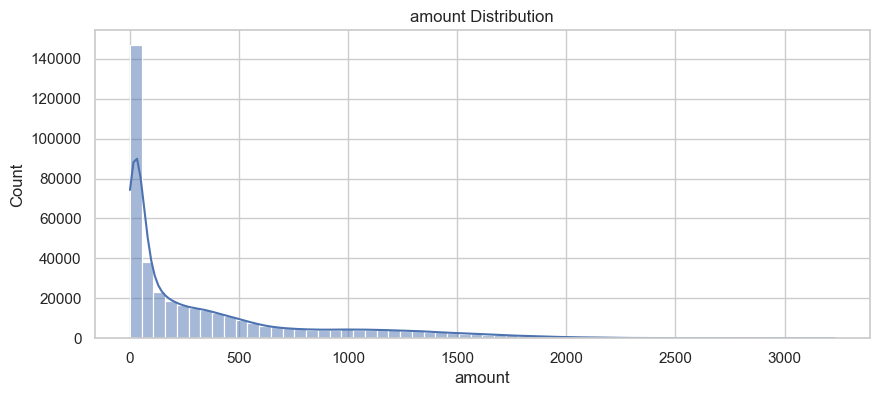

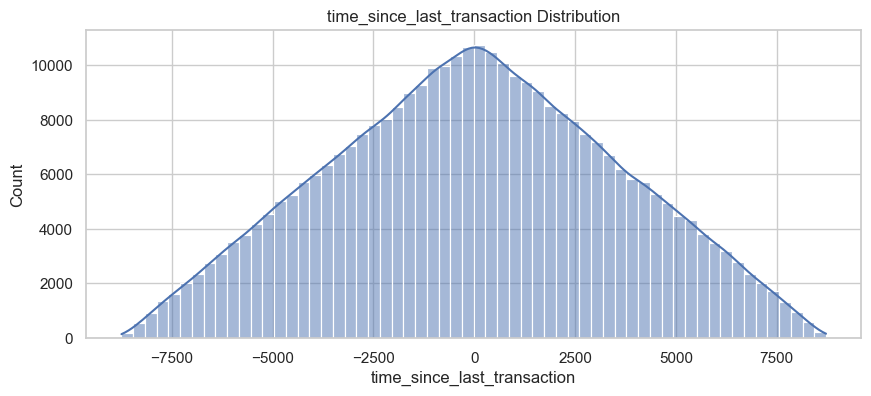

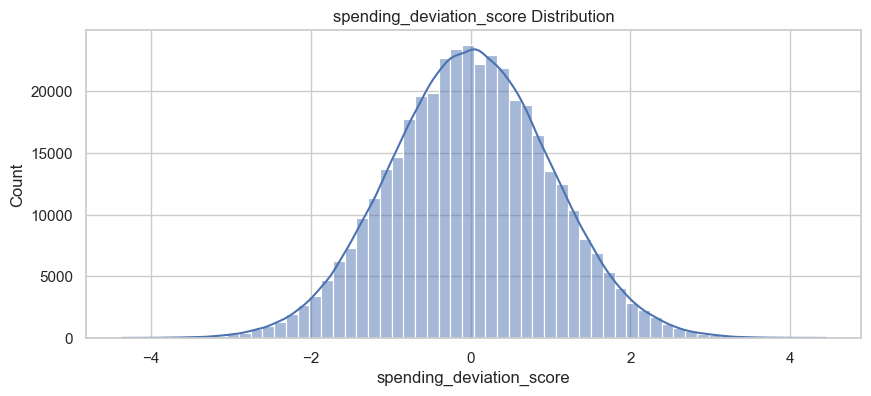

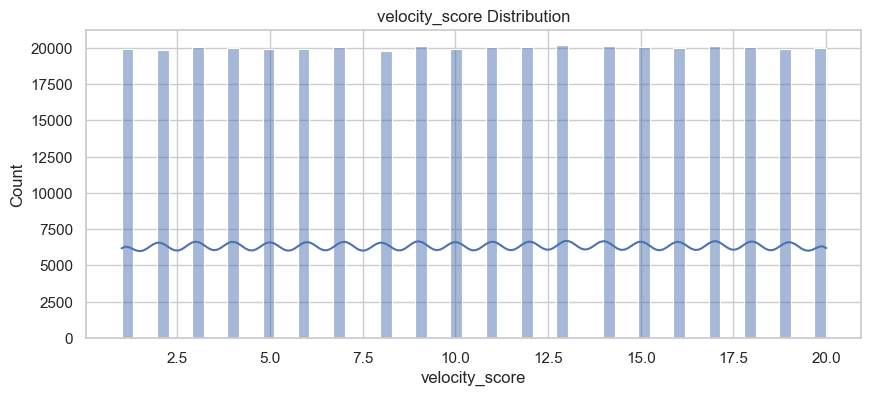

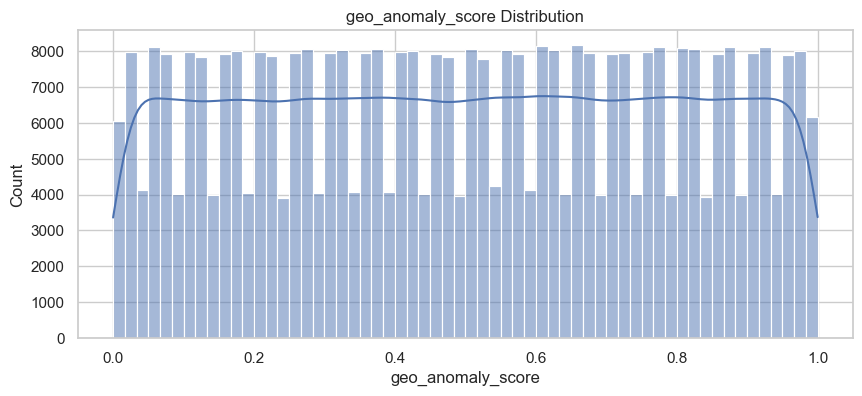

In [94]:
numeric_cols = [
    "amount", "time_since_last_transaction",
    "spending_deviation_score", "velocity_score",
    "geo_anomaly_score"
]

for col in numeric_cols:
    if col in data_sample.columns:
        plt.figure(figsize=(10,4))
        sns.histplot(data_sample[col], bins=60, kde=True)
        plt.title(f"{col} Distribution")
        plt.show()

## 6. Fraud vs Non-Fraud boxplots (numeric features)

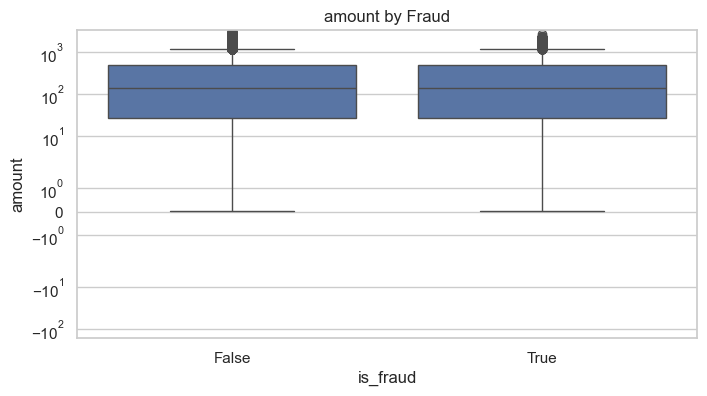

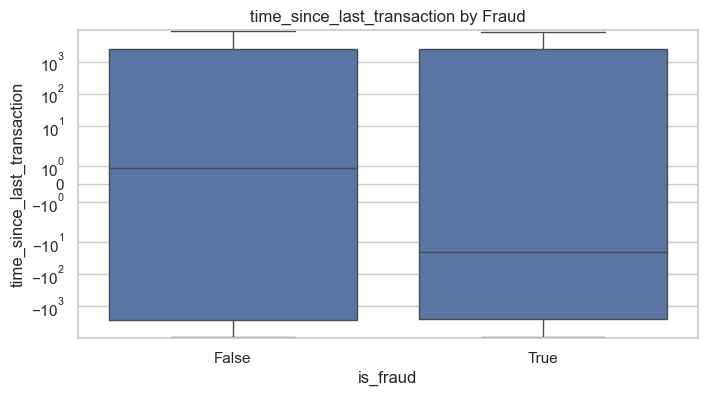

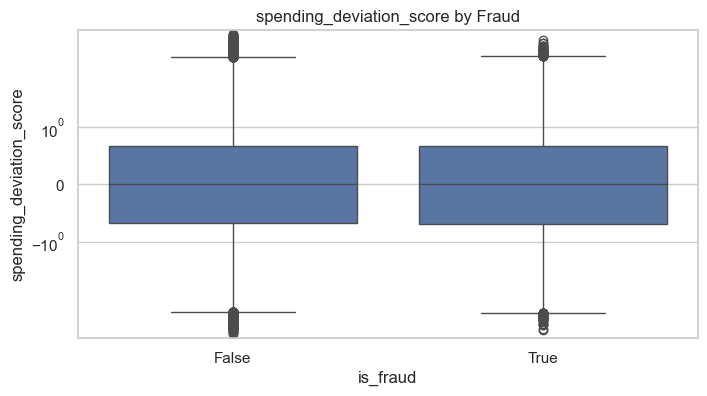

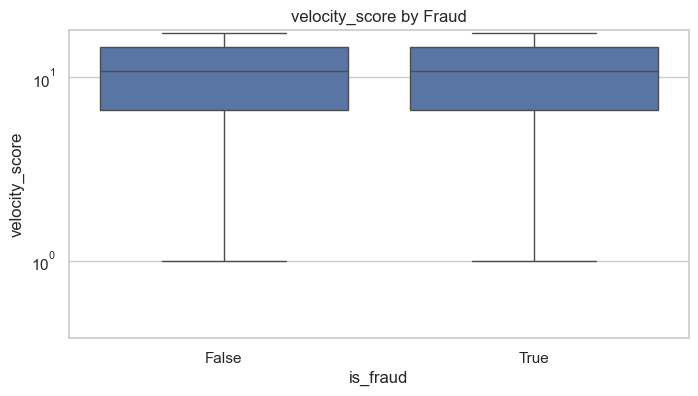

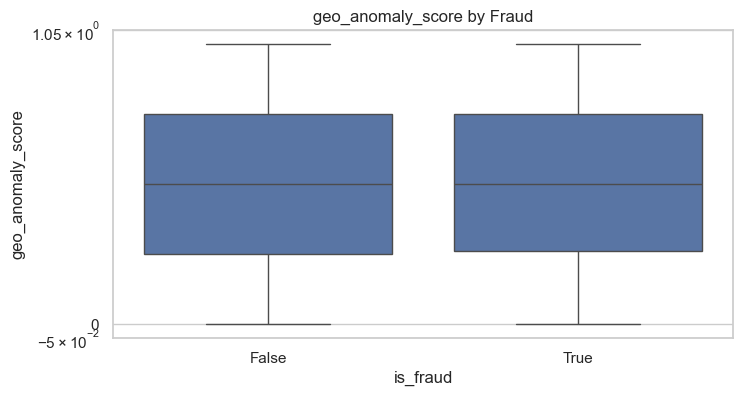

In [95]:
for col in numeric_cols:
    if col in data_sample.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=data_sample, x=fraud_col, y=col)
        plt.title(f"{col} by Fraud")
        plt.yscale("symlog")   # handles heavy tails nicely
        plt.show()

## 7. Correlation heatmap (numeric features)

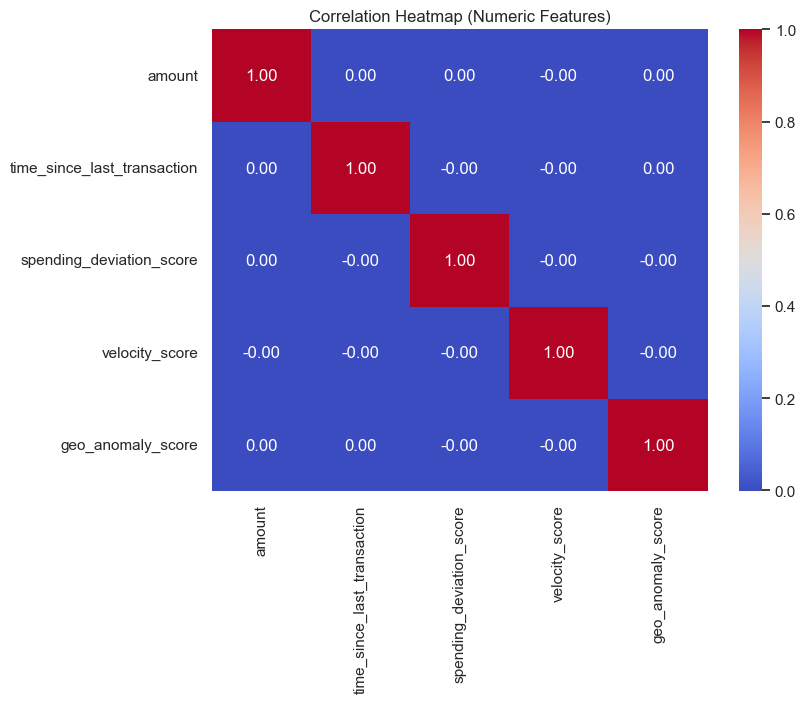

In [96]:
corr = data_sample[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

## 8. Time-based analysis

2025-12-02 22:43:46,781 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-02 22:43:47,079 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


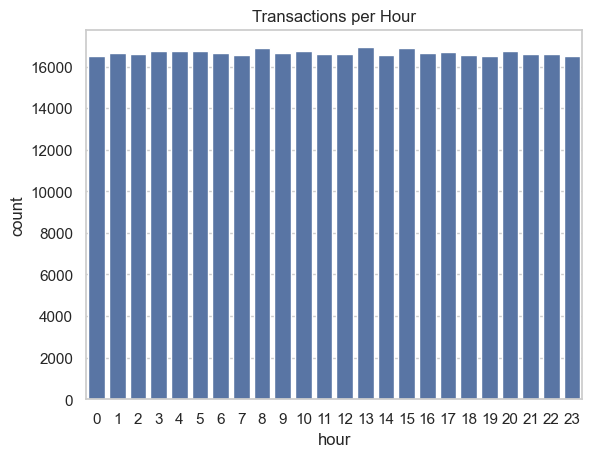

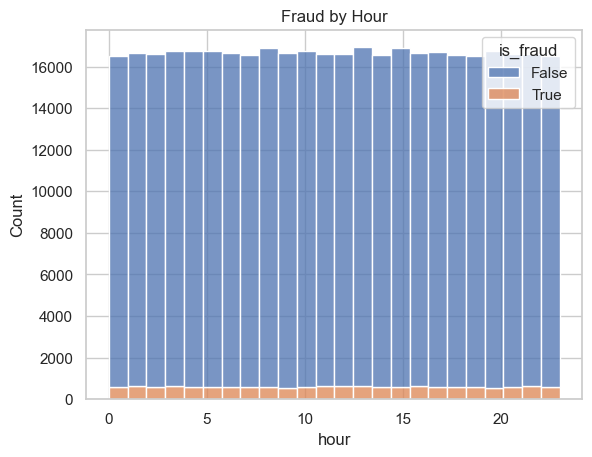

In [97]:
if "timestamp" in data_sample.columns:
    data_sample['timestamp'] = pd.to_datetime(data_sample['timestamp'], errors='coerce')
    data_sample['hour'] = data_sample['timestamp'].dt.hour
    data_sample['day'] = data_sample['timestamp'].dt.dayofweek

    sns.countplot(data=data_sample, x='hour')
    plt.title("Transactions per Hour")
    plt.show()

    sns.histplot(data=data_sample, x='hour', hue='is_fraud', multiple='stack', bins=24)
    plt.title("Fraud by Hour")
    plt.show()
else:
    print("timestamp column missing.")

## 9. Outlier detection (IQR method)

Amount outlier thresholds:
Lower: -689.7600000000001
Upper: 1220.64

Outlier %: 8.2225


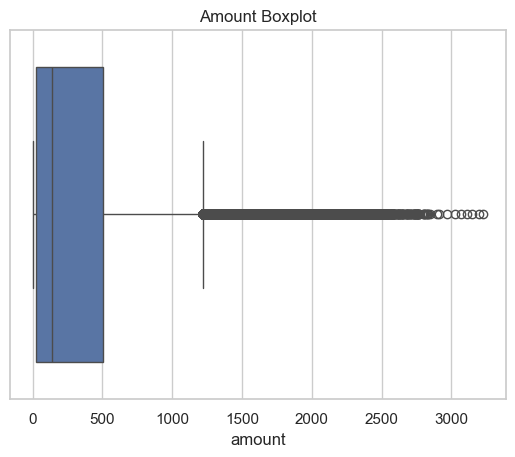

In [98]:
# Outlier detection for amount
if "amount" in data_sample.columns:

    Q1 = data_sample["amount"].quantile(0.25)
    Q3 = data_sample["amount"].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print("Amount outlier thresholds:")
    print("Lower:", lower_limit)
    print("Upper:", upper_limit)

    # flag outliers
    data_sample["amount_outlier"] = ((data_sample["amount"] < lower_limit) |
                                     (data_sample["amount"] > upper_limit)).astype(int)

    print("\nOutlier %:", data_sample["amount_outlier"].mean() * 100)

    sns.boxplot(x=data_sample["amount"])
    plt.title("Amount Boxplot")
    plt.show()

## 10. Save sample for reproducibility

In [99]:
data_sample.to_csv("eda_sample_200k.csv", index=False)
print("Saved sample → eda_sample_200k.csv")

Saved sample → eda_sample_200k.csv


# Data Preprocessing

In [100]:
import logging
import gc
## Library for Data Processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")
log = logging.getLogger("day3")

## Paths and quick checks

In [101]:
RAW_CSV = "financial_fraud_detection_dataset.csv"   # your full CSV
SAMPLE_CSV = "eda_sample_200k.csv"                 # sample created earlier
CLEAN_PARQUET = "data/financial_cleaned.parquet"   # output
# Create data dir if missing
Path("data").mkdir(parents=True, exist_ok=True)

# If the full CSV isn't loaded into `data` variable, load it (careful: large)
if 'data' not in globals():
    log.info("Loading full CSV into memory (this may be heavy).")
    data = pd.read_csv(RAW_CSV, low_memory=False)
    log.info(f"Full data loaded: shape={data.shape}")
else:
    log.info(f"Using pre-loaded DataFrame 'data' with shape {data.shape}")


2025-12-02 22:43:56,996 INFO Using pre-loaded DataFrame 'data' with shape (5000000, 18)


## Ensure sample exists (create from full data if necessary) (Code)

In [102]:
def ensure_sample(sample_path: str = SAMPLE_CSV, desired_n: int = 200_000, df_full: pd.DataFrame = None):
    """Ensure a sample CSV exists. If not, create from provided full df (or by chunking if full df absent)."""
    p = Path(sample_path)
    if p.exists():
        log.info(f"Found existing sample at {sample_path}")
        return pd.read_csv(sample_path)
    # If full df is available, sample directly
    if df_full is not None:
        n = min(desired_n, len(df_full))
        sample_df = df_full.sample(n=n, random_state=42).reset_index(drop=True)
        sample_df.to_csv(p, index=False)
        log.info(f"Created sample from full df at {sample_path} shape={sample_df.shape}")
        return sample_df
    # Fallback: create via chunked sampling (not implemented here since full df exists)
    raise FileNotFoundError("No sample or full DataFrame available to create sample.")

# create or load sample
sample_df = ensure_sample(SAMPLE_CSV, desired_n=200_000, df_full=data)


2025-12-02 22:43:57,021 INFO Found existing sample at eda_sample_200k.csv


## Compute IQR thresholds(Full Data)

In [103]:
# Numeric columns for outlier detection
numeric_cols = [
    col for col in [
        "amount",
        "time_since_last_transaction",
        "spending_deviation_score",
        "velocity_score",
        "geo_anomaly_score"
    ]
    if col in data.columns
]

iqr_thresholds = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # For numeric fraud features, negative values don't make sense → clip lower to 0
    if col in ["amount", "time_since_last_transaction", "spending_deviation_score", "velocity_score", "geo_anomaly_score"]:
        lower = max(lower, 0)

    iqr_thresholds[col] = {
        "q1": Q1,
        "q3": Q3,
        "iqr": IQR,
        "lower": lower,
        "upper": upper
    }

    print(f"\nColumn: {col}")
    print(f"  Q1   = {Q1}")
    print(f"  Q3   = {Q3}")
    print(f"  IQR  = {IQR}")
    print(f"  Lower threshold = {lower}")
    print(f"  Upper threshold = {upper}")


Column: amount
  Q1   = 26.57
  Q3   = 503.89
  IQR  = 477.32
  Lower threshold = 0
  Upper threshold = 1219.87

Column: time_since_last_transaction
  Q1   = -2562.376055962639
  Q3   = 2568.33867056625
  IQR  = 5130.7147265288895
  Lower threshold = 0
  Upper threshold = 10264.410760359584

Column: spending_deviation_score
  Q1   = -0.68
  Q3   = 0.67
  IQR  = 1.35
  Lower threshold = 0
  Upper threshold = 2.6950000000000003

Column: velocity_score
  Q1   = 5.0
  Q3   = 16.0
  IQR  = 11.0
  Lower threshold = 0
  Upper threshold = 32.5

Column: geo_anomaly_score
  Q1   = 0.25
  Q3   = 0.75
  IQR  = 0.5
  Lower threshold = 0
  Upper threshold = 1.5


## Impute time_since_last_transaction

In [104]:
from sklearn.impute import SimpleImputer

if "time_since_last_transaction" in data.columns:
    imputer = SimpleImputer(strategy="mean")
    # fit on full column or on sample? both fine; use full column if present to get realistic mean
    mean_source = data[["time_since_last_transaction"]]
    data["time_since_last_transaction"] = imputer.fit_transform(mean_source).ravel()
    log.info("Imputed missing values in 'time_since_last_transaction' using mean.")
else:
    log.warning("'time_since_last_transaction' not found in data.")
print("Missing Number's: ",data['time_since_last_transaction'].isnull().sum())

2025-12-02 22:44:02,736 INFO Imputed missing values in 'time_since_last_transaction' using mean.


Missing Number's:  0


## Drop fraud_type (96% missing)

In [105]:
data.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.7800,withdrawal,utilities,Tokyo,mobile,False,NaN,1.5258,-0.2100,3,0.2200,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.6500,withdrawal,online,Toronto,atm,False,NaN,1.5258,-0.1400,7,0.9600,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.8600,deposit,other,London,pos,False,NaN,1.5258,-1.7800,20,0.8900,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.2200,deposit,online,Sydney,pos,False,NaN,1.5258,-0.6000,6,0.3700,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.4300,transfer,utilities,Toronto,mobile,False,NaN,1.5258,0.7900,13,0.2700,ACH,108.161.108.255,D7637601


In [106]:
missing_pct = data['fraud_type'].isna().mean() * 100
print(f"'fraud_type' missing percent = {missing_pct:.2f}%")

if missing_pct > 80:   # threshold: if >80% missing we drop
    data = data.drop(columns=['fraud_type'])
    print("Dropped column 'fraud_type' due to high missingness.")
else:
    print("'fraud_type' kept (missing% <= 80%).")


'fraud_type' missing percent = 96.41%
Dropped column 'fraud_type' due to high missingness.


## Apply outlier flags to full dataset (do NOT drop rows)

In [109]:
# Apply flags using computed iqr_thresholds (from sample)
for col, thr in iqr_thresholds.items():
    if col in data.columns:
        flag_col = f"{col}_outlier_iqr"
        data[flag_col] = (
            (pd.to_numeric(data[col], errors='coerce') < thr["lower"]) |
            (pd.to_numeric(data[col], errors='coerce') > thr["upper"])
        ).astype("int8")

        print(f"{flag_col} (sample thresholds applied to full data).")
    else:
        print(f"{col} not present in full data; skipping outlier flag.")


amount_outlier_iqr (sample thresholds applied to full data).
time_since_last_transaction_outlier_iqr (sample thresholds applied to full data).
spending_deviation_score_outlier_iqr (sample thresholds applied to full data).
velocity_score_outlier_iqr (sample thresholds applied to full data).
geo_anomaly_score_outlier_iqr (sample thresholds applied to full data).


##  check for missing values (categorical & numeric)

In [115]:
# Missing values
missing = data.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(data)) * 100

print("\nMissing Values:")
display(pd.DataFrame({"missing": missing, "missing_pct": missing_pct.round(3)}).head(20))


Missing Values:


,missing,missing_pct
transaction_id,0,0.0000
timestamp,0,0.0000
sender_account,0,0.0000
receiver_account,0,0.0000
amount,0,0.0000
transaction_type,0,0.0000
merchant_category,0,0.0000
location,0,0.0000
device_used,0,0.0000
is_fraud,0,0.0000


## Dtype optimization and final small feature creation

In [117]:
# === Minimal dtype optimization & time-feature creation ===
import pandas as pd
import numpy as np

# 1) Ensure target is int8 (0/1)
if "is_fraud" in data.columns:
    data["is_fraud"] = pd.to_numeric(data["is_fraud"], errors="coerce").fillna(0).astype("int8")
    print("[OK] 'is_fraud' -> int8")

# 2) Parse timestamp (if present) and create hour/dayofweek features if missing
if "timestamp" in data.columns:
    # parse once (safe)
    if not pd.api.types.is_datetime64_any_dtype(data["timestamp"]):
        data["timestamp"] = pd.to_datetime(data["timestamp"], errors="coerce")
        print("[OK] 'timestamp' parsed to datetime")
    # create hour/dayofweek only if not already present
    if "hour" not in data.columns:
        data["hour"] = data["timestamp"].dt.hour.fillna(0).astype("int8")
        print("[OK] 'hour' created from timestamp -> int8")
    if "dayofweek" not in data.columns:
        data["dayofweek"] = data["timestamp"].dt.dayofweek.fillna(0).astype("int8")
        print("[OK] 'dayofweek' created from timestamp -> int8")
else:
    print("[WARN] 'timestamp' column not found — skipping time features")

# 3) Ensure hour/dayofweek (if present) are int8 (defensive)
for c in ("hour", "dayofweek"):
    if c in data.columns and not pd.api.types.is_integer_dtype(data[c]):
        data[c] = pd.to_numeric(data[c], errors="coerce").fillna(0).astype("int8")
        print(f"[OK] '{c}' coerced -> int8")

# 4) Downcast float64 -> float32 to reduce memory
float64_cols = [c for c in data.select_dtypes(include=["float64"]).columns]
if float64_cols:
    for c in float64_cols:
        data[c] = pd.to_numeric(data[c], downcast="float")
    print(f"[OK] Downcasted {len(float64_cols)} float64 cols -> float32")
else:
    print("[OK] No float64 columns to downcast")

# 5) Quick memory summary
mem_mb = data.memory_usage(deep=True).sum() / 1024**2
print(f"[MEM] Current dataframe memory usage: {mem_mb:.1f} MB")


[OK] 'is_fraud' -> int8
[OK] 'hour' created from timestamp -> int8
[OK] 'dayofweek' created from timestamp -> int8
[OK] Downcasted 4 float64 cols -> float32
[MEM] Current dataframe memory usage: 1840.1 MB


## Validation checks

In [119]:
# Basic validations
print("Shape:", data.shape)
# Show outlier-flag fractions
flag_cols = [c for c in data.columns if c.endswith("_outlier_iqr")]
for c in flag_cols:
    print(f"{c}: {data[c].mean()*100:.4f}%")

# Show fraud rate
if "is_fraud" in data.columns:
    print("\nFraud distribution:")
    print(data["is_fraud"].value_counts(normalize=True) * 100)


Shape: (5000000, 24)
amount_outlier_iqr: 8.2490%
time_since_last_transaction_outlier_iqr: 41.0266%
spending_deviation_score_outlier_iqr: 50.1575%
velocity_score_outlier_iqr: 0.0000%
geo_anomaly_score_outlier_iqr: 0.0000%

Fraud distribution:
is_fraud
0   96.4089
1    3.5911
Name: proportion, dtype: float64


## Save cleaned dataset

In [122]:
# Save cleaned dataset as Parquet for Day 4
Path("data").mkdir(exist_ok=True)
out_path = Path(CLEAN_PARQUET)

print(f"Writing cleaned data to {out_path} (this may take time)...")

data.to_parquet(out_path, index=False, compression="snappy")

print("Write complete. Cleaned data is ready for feature engineering.")

Writing cleaned data to data\financial_cleaned.parquet (this may take time)...
Write complete. Cleaned data is ready for feature engineering.
